# Deep Matching

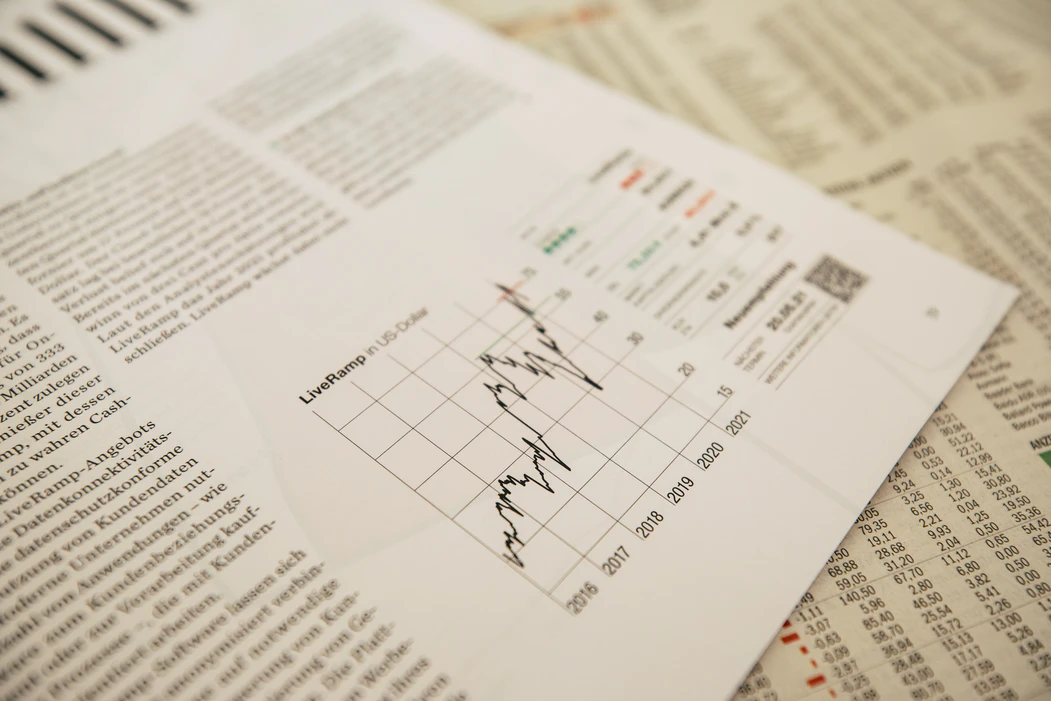

In [1]:
import csv 
import json
import string
import random
import typing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
import keras

2021-08-01 16:26:42.111590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-01 16:26:42.111619: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# python3 -m spacy download en_core_web_sm
english: spacy.lang.en.English = spacy.load("en_core_web_sm")
    
np.random.seed(5)

In [3]:
def random_string(size: int = 10) -> str:
    """
    Generates a random string.
    """
    chars: str = string.ascii_lowercase + "aeiou" * 30 + "rtsmpcnlgr" * 15
    return "".join([
        random.choice(chars)
        for _ in range(size)
    ])

assert isinstance(random_string(), str)
assert random_string() != random_string()
assert len(random_string(10)) == 10
assert len(random_string(20)) == 20

In [4]:
def random_integer(low: int = 0, high: int = 100) -> int:
    """
    Generates a random integer.
    """
    return random.randint(low, high)

assert isinstance(random_integer(), int)
assert random_integer() >= 0
assert random_integer() <= 100
assert random_integer(low=120, high=140) >= 120
assert random_integer(low=120, high=140) <= 140

In [5]:
def random_float(low: int = 0, high: int = 100) -> float:
    """
    Generates a random float number.
    """
    return random.uniform(low, high)

assert isinstance(random_float(), float)
assert random_float() >= 0
assert random_float() <= 100
assert random_float(low=120, high=140) <= 140
assert random_float(low=120, high=140) >= 120

In [6]:
def random_probability() -> float:
    """
    Generates a random probability float number.
    """
    return random.uniform(0, 1)

assert isinstance(random_probability(), float)
assert random_probability() >= 0
assert random_probability() <= 1

In [7]:
def random_event(probability: float = 0.5) -> bool:
    """
    Generates a determines the occurrence of a random event.
    """
    assert probability >= 0
    assert probability <= 1
    return random_probability() < probability

assert isinstance(random_event(), bool)
assert random_event(probability=1) is True
assert random_event(probability=0) is False

In [8]:
def random_option(options: list) -> str:
    """
    Selects a value from a list randomly.
    """
    return random.choice(list(set(options)))

assert random_option([1, 2, 3]) in [1, 2, 3]

In [9]:
def random_phone() -> str:
    """
    Generates a random phone number.
    """
    return "-".join(
        [
            str(random_integer(100, 999)),
            str(random_integer(100, 999)),
            str(random_integer(1000, 9999)),
        ]
    )

assert isinstance(random_phone(), str)
assert random_phone() != random_phone()

In [10]:
def random_name() -> str:
    """
    Generates a random name.
    """
    return " ".join(
        [
            random_string(random_integer(8, 12)),
            random_string(random_integer(8, 12)),
        ]
    ).title()

assert isinstance(random_name(), str)
assert random_name() != random_name()

In [11]:
def random_city() -> str:
    """
    Generates a random city name.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_city(), str)
assert random_city() != random_city()

In [12]:
def random_website() -> str:
    """
    Generates a random website.
    """
    return ".".join(
        [
            "www",
            random_string(random_integer(7, 15)),
            random_option(["com", "net", "org"]),
        ]
    ).lower()

assert isinstance(random_website(), str)
assert random_website() != random_website()

In [13]:
def random_linkedin_url() -> str:
    """
    Generates a random LinkedIn URL.
    """
    return "/".join(
        [
            "www.linkedin.com",
            "u",
            random_string(random_integer(8, 15)),
        ]
    ).lower()

assert isinstance(random_linkedin_url(), str)
assert random_linkedin_url() != random_linkedin_url()

In [14]:
def random_facebook_url() -> str:
    """
    Generates a random Facebook URL.
    """
    return "/".join(
        [
            "https://",
            "www.facebook.com",
            "profile",
            random_string(random_integer(8, 15)),
        ]
    ).lower()

assert isinstance(random_facebook_url(), str)
assert random_facebook_url() != random_facebook_url()

In [15]:
def random_country() -> str:
    """
    Generates a random country.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_country(), str)
assert random_country() != random_country()

In [16]:
def random_street() -> str:
    """
    Generates a random street address.
    """
    return " ".join(
        [
            str(random_integer(1, 999)),
            random_string(random_integer(3, 8)),
            random_string(random_integer(4, 6)) + ",",
            random_string(random_integer(4, 6)),
            random_option(["St.", "Av."]),
        ]
    ).title()

assert isinstance(random_street(), str)
assert random_street() != random_street()

In [17]:
def similar_string(value: str, mutability: float = 0.2) -> str:
    """
    Generates a random string similar to a given string.
    """
    new_value: list = list(value)
    for i in range(len(new_value)):
        if random_event(mutability):
            new_value[i] = random_string(1)
    if new_value and random_event(mutability):
        new_value.pop(-1)
    if new_value and random_event(mutability):
        new_value.append(random_string(1))
    if not new_value and random_event(mutability):
        new_value: str = random_string(random_integer(4, 12))
    return "".join(new_value)

assert isinstance(similar_string("a", mutability=0.5), str)
assert similar_string("a", mutability=0.0) == "a"
assert similar_string("a", mutability=1.0) != "a"
assert similar_string("aaaaaa", mutability=1.0) != similar_string("aaaaaa", mutability=1)

In [18]:
def similar_dict(record: dict, mutability: float = 0.1) -> dict:
    """
    Generates a random dictionary similar to a given dictionary.
    """
    other: dict = {}
    for k, v in record.items():
        if isinstance(v, str):
            other[k] = similar_string(value=v, mutability=mutability)
        else:
            other[k] = v
    return other

assert isinstance(similar_dict({"a": "b"}, mutability=0.5), dict)
assert similar_dict({"a": "b"}, mutability=0.0) == {"a": "b"}
assert similar_dict({"a": "b"}, mutability=1.0) != {"a": "b"}

In [19]:
def random_company(nulls: float = 0.1) -> dict:
    """
    Generates a random dictionary representation of a company.
    """
    return {
        "city": "" if random_event(probability=nulls) else random_city(),
        "country": "" if random_event(probability=nulls) else random_country(),
        "company_name": random_name(),
        "phone": "" if random_event(probability=nulls) else random_phone(),
        "street_address": "" if random_event(probability=nulls) else random_street(),
        "website": "" if random_event(probability=nulls) else random_website(),
        "linkedin_url": "" if random_event(probability=nulls) else random_linkedin_url(),
        "facebook_url": "" if random_event(probability=nulls) else random_facebook_url(),
    }

assert isinstance(random_company(), dict)
assert all(isinstance(k, str) for k in random_company().keys())
assert all(isinstance(v, str) for v in random_company().values())

In [20]:
def random_person(nulls: float = 0.1) -> dict:
    """
    Generates a random representation of a person.
    """
    return {
        "city": "" if random_event(probability=nulls) else random_city(),
        "country": "" if random_event(probability=nulls) else random_country(),
        "name": random_name(),
        "phone": "" if random_event(probability=nulls) else random_phone(),
        "street_address": "" if random_event(probability=nulls) else random_street(),
        "linkedin_url": "" if random_event(probability=nulls) else random_linkedin_url(),
        "facebook_url": "" if random_event(probability=nulls) else random_facebook_url(),
    }

assert isinstance(random_person(), dict)
assert all(isinstance(k, str) for k in random_person().keys())
assert all(isinstance(v, str) for v in random_person().values())

In [21]:
def add_suffix(record: dict, suffix: str) -> dict:
    """
    Appends a suffix to all the keys of a given dictionary.
    """
    return {f"{k}#{suffix}": v for k, v in record.items()}

assert add_suffix({"a": "b"}, "1") == {"a#1": "b"}
assert add_suffix({"a": "b"}, "2") == {"a#2": "b"}

In [24]:
def vectorize_string(text: typing.Optional[str]) -> np.ndarray:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    if not isinstance(text, str) or text == "":
        return np.zeros(96)
    return english(text).vector

assert isinstance(vectorize_string("lorem"), np.ndarray)
assert np.array_equal(vectorize_string("lorem"), vectorize_string("lorem"))
assert vectorize_string("lorem").shape == (96, )
assert isinstance(vectorize_string(""), np.ndarray)
assert np.array_equal(vectorize_string(""), vectorize_string(""))
assert vectorize_string("").shape == (96, )

In [25]:
def vectorize_dataframe(dataset: pd.DataFrame, target: str = 'match') -> pd.DataFrame:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    vectorized_dataset: pd.DataFrame = dataset.copy()  
    for feature in vectorized_dataset.columns:
        if feature != target:
            print("Vectorizing:", feature)
            vectorized_dataset[feature] = vectorized_dataset[feature].apply(vectorize_string).apply(np.array)
    return vectorized_dataset

assert isinstance(vectorize_dataframe(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
)['a'][0], np.ndarray)
assert isinstance(vectorize_dataframe(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
)['a'][1], np.ndarray)
assert vectorize_dataframe(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
).shape == (2, 2)

Vectorizing: a
Vectorizing: a
Vectorizing: a


Companies: (1, 17)
Companies: (1, 17)
Companies: (1, 17)
Companies: (1, 17)
Companies: (2, 17)


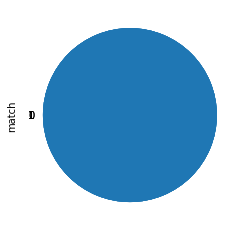

In [26]:
def generate_random_companies(
    total: int = 1000,
    target: str = 'match',
    matches: float = 0.5,
    nulls: float = 0.1,
    mutability: float = 0.01,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total companies.
    """
    raw_companies_list: typing.List[dict] = []
    for _ in range(total):
        company1: dict = random_company(nulls=nulls)
        if random_event(probability=matches):
            company2: dict = similar_dict(company1, mutability=mutability)
            match: str = "1" 
        else:
            company2: dict = random_company(nulls=0.1)
            match: str = "0" 
        row: dict = {}
        for k, v in add_suffix(company1, "1").items():
            row[k] = v 
        for k, v in add_suffix(company2, "2").items():
            row[k] = v 
        raw_companies_list.append({
            **add_suffix(company1, "1"),
            **add_suffix(company2, "2"),
            target: match,
        })
    raw_companies_dataframe: pd.DataFrame = pd.DataFrame(raw_companies_list)
    raw_companies_dataframe[target] = raw_companies_dataframe[target].astype(int)
    print("Companies:", raw_companies_dataframe.shape)
    raw_companies_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_companies_dataframe

assert isinstance(generate_random_companies(total=1), pd.DataFrame)
assert not generate_random_companies(total=1).equals(generate_random_companies(total=1))
assert generate_random_companies(total=1).shape == (1, 17)
assert generate_random_companies(total=2).shape == (2, 17)

Persons: (1, 15)
Persons: (1, 15)
Persons: (1, 15)
Persons: (1, 15)
Persons: (2, 15)


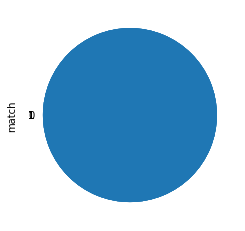

In [27]:
def generate_random_persons(
    total: int = 1000,
    target: str = 'match',
    matches: float = 0.5,
    nulls: float = 0.1,
    mutability: float = 0.01,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total persons.
    """
    raw_persons_list: typing.List[dict] = []
    for _ in range(total):
        person1: dict = random_person(nulls=nulls)
        if random_event(probability=matches):
            person2: dict = similar_dict(person1, mutability=mutability)
            match: str = "1" 
        else:
            person2: dict = random_person(nulls=0.1)
            match: str = "0" 
        row: dict = {}
        for k, v in add_suffix(person1, "1").items():
            row[k] = v 
        for k, v in add_suffix(person2, "2").items():
            row[k] = v 
        raw_persons_list.append({
            **add_suffix(person1, "1"),
            **add_suffix(person2, "2"),
            target: match,
        })
    raw_persons_dataframe: pd.DataFrame = pd.DataFrame(raw_persons_list)
    raw_persons_dataframe[target] = raw_persons_dataframe[target].astype(int)
    print("Persons:", raw_persons_dataframe.shape)
    raw_persons_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_persons_dataframe

assert isinstance(generate_random_persons(total=1), pd.DataFrame)
assert not generate_random_persons(total=1).equals(generate_random_persons(total=1))
assert generate_random_persons(total=1).shape == (1, 15)
assert generate_random_persons(total=2).shape == (2, 15)

Predictors: ['a']
Predicted: m
X (20, 1)
Y (20,)
Train (12, 1) (12,)
Test (4, 1) (4,)
Val (4, 1) (4,)
Splitting: a
Train: (1, 12, 3) (12,)
Test: (1, 4, 3) (4,)
Val: (1, 4, 3) (4,)
Train: (12, 1, 3) (12,)
Test: (4, 1, 3) (4,)
Val: (4, 1, 3) (4,)
Matches: [6, 2, 2] [12, 4, 4]


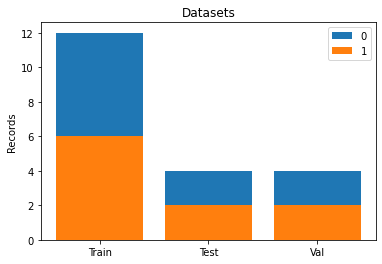

In [28]:
def split(
    dataset: pd.DataFrame,
    target: str = 'match',
    test_size: float = 0.2,
    val_size: float = 0.2,
    random_state: int = 5,
) -> typing.Tuple[np.ndarray]:

    features = [column for column in dataset.columns if column != target]

    print("Predictors:", features)
    print("Predicted:", target)
    
    x: pd.DataFrame = dataset[features]
    y: pd.DataFrame = dataset[target]
    assert x.shape[0] == y.shape[0]
        
    print("X", x.shape)
    print("Y", y.shape)
    
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
        stratify=y,
    )
    x_train, x_val, y_train, y_val = train_test_split(
        x_train,
        y_train,
        test_size=val_size,
        random_state=random_state,
        shuffle=True,
        stratify=y_train,
    )
    
    print("Train", x_train.shape, y_train.shape)
    print("Test", x_test.shape, y_test.shape)
    print("Val", x_val.shape, y_val.shape)

    assert x_train.shape[0] == y_train.shape[0]
    assert x_test.shape[0] == y_test.shape[0]
    assert x_val.shape[0] == y_val.shape[0]

    assert x_train.shape[1] == x_test.shape[1]
    assert x_train.shape[1] == x_val.shape[1]
    assert x_test.shape[1] == x_val.shape[1]

    assert x_train.shape[0] + x_test.shape[0] + x_val.shape[0] == x.shape[0]
    assert y_train.shape[0] + y_test.shape[0] + y_val.shape[0] == y.shape[0]

    y_train: np.ndarray = y_train.values
    y_test: np.ndarray = y_test.values
    y_val: np.ndarray = y_val.values
    
    train: typing.List[np.array] = []
    test: typing.List[np.array] = []
    val: typing.List[np.array] = []

    for feature in features:
        print("Splitting:", feature)
        train.append(np.array(x_train[feature].to_list()))
        test.append(np.array(x_test[feature].to_list()))
        val.append(np.array(x_val[feature].to_list()))

    train: np.array = np.array(train)
    test: np.array = np.array(test)
    val: np.array = np.array(val)

    print("Train:", train.shape, y_train.shape)
    print("Test:", test.shape, y_test.shape)
    print("Val:", val.shape, y_val.shape)

    train: np.array = np.swapaxes(train, 0, 1)
    test: np.array = np.swapaxes(test, 0, 1)
    val: np.array = np.swapaxes(val, 0, 1)

    print("Train:", train.shape, y_train.shape)
    print("Test:", test.shape, y_test.shape)
    print("Val:", val.shape, y_val.shape)
        
    matches: list = [
        sum(y_train == 1),
        sum(y_test == 1),
        sum(y_val == 1),   
    ]
    missmatches: list = [
        y_train.shape[0],
        y_test.shape[0],
        y_val.shape[0],   
    ]
    print("Matches:", matches, missmatches)
    assert matches != missmatches, "Too many matches!"
    assert all(matches), "Not enough matches!"
    assert all(missmatches), "Not enough missmatches!"
    labels: list = ['Train', 'Test', 'Val']
    fig, ax = plt.subplots()
    ax.bar(labels, missmatches, label='0')
    ax.bar(labels, matches, label='1')
    ax.set_ylabel('Records')
    ax.set_title('Datasets')
    ax.legend()
    plt.show()
    
    return train, y_train, test, y_test, val, y_val


x_train, y_train, x_test, y_test, x_val, y_val = split(
    dataset=pd.DataFrame({"a": [np.array([1, 2, 3])] * 20, "m": [1, 0] * 10}),
    target='m',
    test_size=0.2,
    val_size=0.2,
)
assert x_train.shape == (12, 1, 3)
assert y_train.shape == (12, )
assert x_test.shape == (4, 1, 3)
assert y_test.shape == (4, )
assert x_val.shape == (4, 1, 3)
assert y_val.shape == (4, )
assert isinstance(x_train, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(x_test, np.ndarray)
assert isinstance(y_test, np.ndarray)
assert isinstance(x_val, np.ndarray)
assert isinstance(y_val, np.ndarray)

Input: (2, 2, 2)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2, 2)]            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 16384)             81920     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 8192)              134225920 
_________________________________________________________________
dropout_4 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096) 

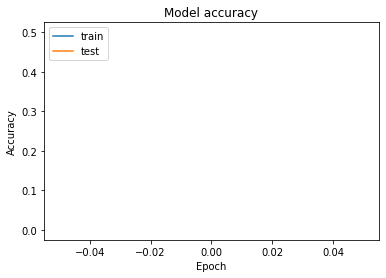

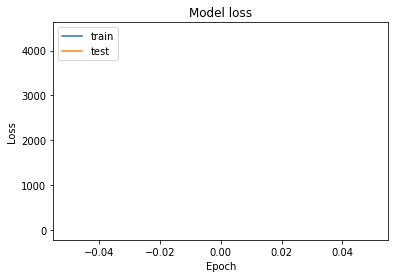

1/1 [==============================] - 0s 102ms/step - loss: 4409.1089 - accuracy: 0.5000
Metrics: 4409.10888671875 0.5


In [31]:
def train_find_matches(
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
    x_val: np.ndarray,
    y_val: np.ndarray,
    learning_rate: float = 0.0001,
    batch_size: int = 30,
    epochs: int = 1,
) -> typing.Tuple[keras.models.Model, float, float]:
    """
    Trains a classifier to find matches.
    """
    print("Input:", x_train.shape)
    
    input_layer: keras.layers.Input = keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
    flatten: keras.layers.Flatten = keras.layers.Flatten()(input_layer)

    dense1: keras.layers.Dense = keras.layers.Dense(16384, activation='relu')(flatten)
    dropout1: keras.layers.Dropout = keras.layers.Dropout(0.0001)(dense1)

    dense2: keras.layers.Dense = keras.layers.Dense(8192, activation='relu')(dropout1)
    dropout2: keras.layers.Dropout = keras.layers.Dropout(0.0001)(dense2)

    dense3: keras.layers.Dense = keras.layers.Dense(4096, activation='relu')(dropout2)
    dropout3: keras.layers.Dropout = keras.layers.Dropout(0.0001)(dense3)

    out: keras.layers.Dense = keras.layers.Dense(1, activation='sigmoid')(dropout3)

    model: keras.Model = keras.Model(inputs=[input_layer, ], outputs=out)

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.Accuracy()
        ],
    )

    print(model.summary())
    
    history: keras.callbacks.History = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test),
    )

    print(history.history)

    # Summarize history of accuracy.
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Summarize history for loss.
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    loss, accuracy = model.evaluate(x_val, y_val, batch_size=128)
    print("Metrics:", loss, accuracy)
    
    return model, loss, accuracy


x: np.array = np.array([[[0, 1], [0, 1]], [[0, 1], [0, 1]]])
y: np.array = np.array([0, 1])
model, loss, accuracy = train_find_matches(
    x_train=x,
    y_train=y,
    x_test=x,
    y_test=y,
    x_val=x,
    y_val=y,
    epochs=1,
    learning_rate=0.01,
    batch_size=50,
)
assert isinstance(model, keras.models.Model)
assert isinstance(loss, float)
assert isinstance(accuracy, float)

In [56]:
 def predict_find_matches(model: keras.models.Model, records: list) -> list:
    """
    Uses a trained model to find matches.
    """
    data: pd.DataFrame = vectorize_dataframe(pd.DataFrame(records, columns=list(records[0].keys())))
    features: typing.List[np.ndarray] = []
    for feature in data.columns:
        features.append(np.array(data[feature].to_list()))
    input_vector: np.array = np.array(features)
    print("Input:", input_vector.shape)
    input_vector: np.array = np.swapaxes(input_vector, 0, 1)
    print("Input:", input_vector.shape)
    predictions: list = model.predict(input_vector)
    print("Predictions:", predictions)
    return predictions

### Companies Dataset

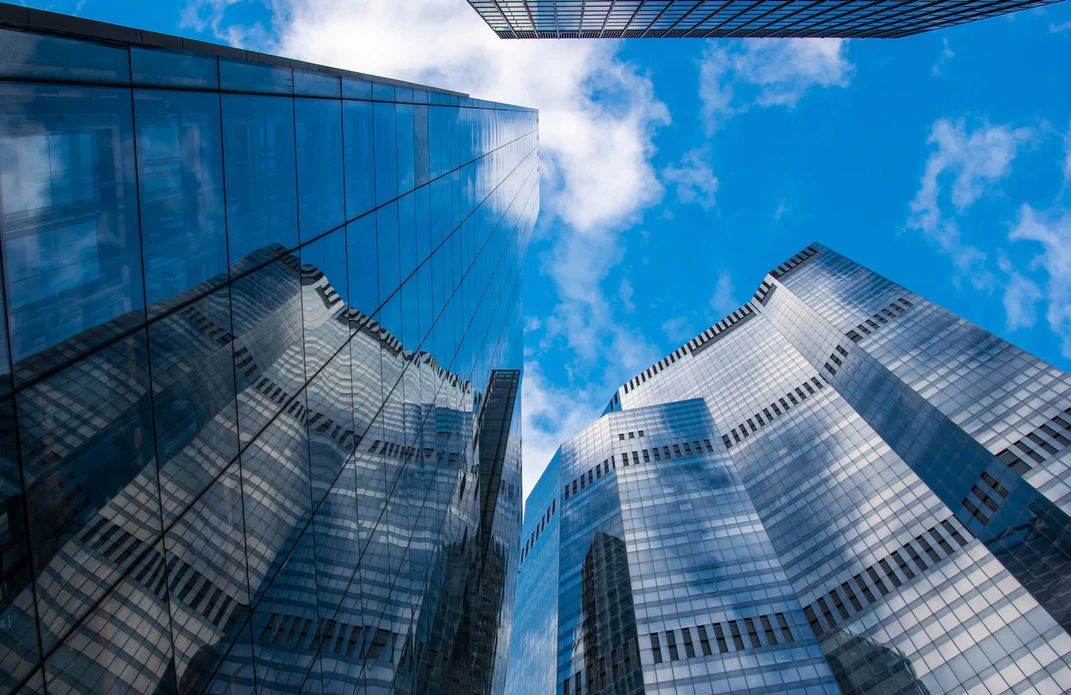

Companies: (20, 17)


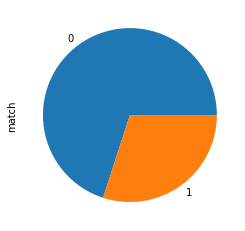

In [32]:
raw_companies_dataframe: pd.DataFrame = generate_random_companies(total=20, nulls=.01, mutability=.01, matches=.3)

In [33]:
raw_companies_dataframe.head(10)

city#1    country#1            company_name#1       phone#1  \
0   Dlimol Iasr  Inpacc Trae         Naoeriim Iraiesyo  414-786-7592   
1        Rglupu    Ologtaaou     Iurueagieu Iceskueaio  288-363-2135   
2     Oerggiota    Golocxear       Ruteecgoan Uerrgiot  784-224-2524   
3      Ineo Cai    Tfugqiarm     Lxaorojrp Ogumuopspcv  292-631-8377   
4     Uoa Acfir   Xqiu Ioanc         Aglogntm Otimotel  582-463-5437   
5   Puun Sonrou    Ilritrlap     Ipoiiermrsrt Ipnunmue  912-877-5057   
6    Rrmi Aacli    Roxternue  Aquptnaileiu Qrueooualca  607-622-3478   
7  Ortuoe Riuis       Lagrcu     Egatopcpoa Sogoliormi  343-112-5799   
8    Yiou Runpa   Tee Gmmgpu    Ogocsoamcolm Opsegaoua  913-255-6173   
9       Uougloi   Mes Rrgiat       Emrgtctnol Iacsical  502-541-1652   

                  street_address#1              website#1  \
0        511 Spiw Gsoe, Otaouc St.        www.nsreeat.com   
1       928 Uaaisna Rreg, Oing Av.       www.nlomipsq.com   
2         398 Fiot Raipi, Eugp Av.     www.stnnoiiolp.com   
3    807 Nlrioaoo Smumu, Uopei Av.       www.ameiepla.net   
4       380 Egrio Ilnpr, Aauoo St.      www.erduacsoe.net   
5   443 Rtlaucie Esarr, Rtrdee Av.  www.mcuplepouaruo.com   
6    675 Tiagem Oietsi, Gelctr St.   www.sceuaoeeemid.net   
7                                    www.ceculaongpra.com   
8  900 Riflcirl Pparet, Peonet St.  www.apoaustuuuici.org   
9       566 Fsulsu Etlpa, Ckil Av.       www.prgerntc.com   

                       linkedin_url#1  \
0       www.linkedin.com/u/ceizlccoet   
1  www.linkedin.com/u/retaxlcrtlyiait   
2   www.linkedin.com/u/ucotanpoapieis   
3   www.linkedin.com/u/moucmcgrkoiemu   
4      www.linkedin.com/u/ootioetrang   
5         www.linkedin.com/u/urrecrct   
6    www.linkedin.com/u/aoalroclplmtn   
7     www.linkedin.com/u/rsseaictggra   
8      www.linkedin.com/u/roaroearrnb   
9     www.linkedin.com/u/iavaluoasupm   

                                      facebook_url#1         city#2  \
0  https:///www.facebook.com/profile/oopdraomraiaich    Iiapuiaoeur   
1         https:///www.facebook.com/profile/encaedrr      Oaueolmtd   
2    https:///www.facebook.com/profile/anolrmluumlrr      Oerggiota   
3    https:///www.facebook.com/profile/useauulraraet       Ineo Cai   
4    https:///www.facebook.com/profile/lauepuiralojv     Snarrmgees   
5       https:///www.facebook.com/profile/nmrtilalct  Anlpmr Cprgim   
6         https:///www.facebook.com/profile/pliinlce      Ouug Roui   
7        https:///www.facebook.com/profile/macuaeers                  
8      https:///www.facebook.com/profile/lpaocuqoyoc     Mmrrxelolr   
9        https:///www.facebook.com/profile/omuucotoa      Gaeeuagrn   

      country#2           company_name#2       phone#2  \
0   Ermom Epgpo  Taitulngna Tnililseogpi  647-829-6507   
1     Suricsits     Uigruemeac Laiceatnr  200-716-2824   
2     Golocxear      Ruteecgoan Uerrgiot  784-224-2524   
3     Tfugqiarm    Lxaorojrp Ogumuopspcv  292-631-8377   
4  Nsioc Ttueup   Umnfgeleimeo Rgrgnplae  278-966-8265   
5     Elecilgag      Ylassairir Migtaoum  437-684-7110   
6        Mrcupa      Ctsitpaus Srrclymfo  119-898-3694   
7      Suismxce     Arineemoh Etlcaegcpj  730-871-8718   
8     Mupcu Lur   Imarieaitt Paunomigttn  524-874-5092   
9                  Rasipmsc Rirrrcarsrau  593-247-5236   

                street_address#2             website#2  \
0         73 Ieol Tgai, Igaa Av.    www.ciorctnneg.net   
1                                 www.pycuumopuooa.org   
2       398 Fiot Raipi, Eugp Av.    www.stnnoiiolp.com   
3  807 Nlrioaoo Smumu, Uopei Av.      www.ameiepls.net   
4    874 Inla Piimat, Riocum St.       www.igupsll.org   
5                                 www.ireocnltroaa.net   
6     591 Cieeo Eigek, Aiico Av.     www.eactlactu.org   
7                                      www.uoreiit.net   
8     203 Aonmi Secpm, Ieugo Av.      www.atmomgni.net   
9     133 Mrprm Aofa, Greinx St.    www.gwguaptsig.net   

                       linkedin_

In [34]:
vectorized_companies_dataframe: pd.DataFrame = vectorize_dataframe(raw_companies_dataframe)

Vectorizing: city#1
Vectorizing: country#1
Vectorizing: company_name#1
Vectorizing: phone#1
Vectorizing: street_address#1
Vectorizing: website#1
Vectorizing: linkedin_url#1
Vectorizing: facebook_url#1
Vectorizing: city#2
Vectorizing: country#2
Vectorizing: company_name#2
Vectorizing: phone#2
Vectorizing: street_address#2
Vectorizing: website#2
Vectorizing: linkedin_url#2
Vectorizing: facebook_url#2


In [35]:
vectorized_companies_dataframe.head(10)

city#1  \
0  [-0.2582786, -0.3905059, 0.4717507, 0.27650297...   
1  [-0.5134958, -0.58252585, 0.17806023, 0.031159...   
2  [-0.20400111, -0.115155414, -0.286429, 0.51071...   
3  [-0.21408924, -0.62112296, 0.7292341, -0.18607...   
4  [0.094851404, -0.56977403, -0.02228412, 0.0502...   
5  [0.03897592, -0.69289374, 0.62555474, 0.018735...   
6  [0.6563053, -0.6681045, 0.66506857, -0.0086450...   
7  [0.13231683, -1.0479857, 0.4847964, -0.4184715...   
8  [0.14851883, -0.44512904, 0.27080667, 0.079310...   
9  [-0.27261055, -0.7908175, -0.16812655, 0.81657...   

                                           country#1  \
0  [-0.35137224, -0.9247454, 0.29908964, 0.217342...   
1  [-0.37072107, -0.66707456, -0.29116592, 0.0614...   
2  [0.16169831, -0.9792019, -0.018647015, 0.16484...   
3  [0.74748945, -0.5565069, 0.12890388, 0.0857926...   
4  [0.01570791, -0.5746119, 0.5772943, -0.0288189...   
5  [0.08618081, -0.8173323, -1.1400526, 0.4934496...   
6  [-0.64265996, -0.5873847, -0.54393226, -0.4393...   
7  [-0.5901661, -0.97926515, -0.33126143, -0.3019...   
8  [-0.4228108, -0.6158955, 0.53819335, 0.1462359...   
9  [-0.50271225, -0.17719805, 0.112904124, 0.2325...   

                                      company_name#1  \
0  [0.13386023, -0.28293675, 0.5803602, 0.0280818...   
1  [-0.28646636, -1.0881541, 0.392396, -0.1171518...   
2  [0.36234564, -0.07988015, -0.23021685, -0.0923...   
3  [0.017239392, -0.38252938, -0.26383793, -0.008...   
4  [0.36554265, -0.48045617, -0.07140942, 0.17714...   
5  [0.034597844, -0.9684388, 0.39487922, -0.22178...   
6  [-0.02470743, -0.28942275, 0.5362157, 0.025957...   
7  [-0.28918082, -0.5563091, -0.18529494, 0.45443...   
8  [-0.04291506, -0.48177743, 0.02521529, 0.32190...   
9  [-0.024705328, -0.35471752, 0.31495103, 0.5416...   

                                             phone#1  \
0  [0.18676117, 0.56288594, 0.11241541, -0.622119...   
1  [0.11555736, 0.626035, 0.1732038, -0.71502036,...   
2  [0.34577364, 0.4197608, 0.0946504, -0.41635197...   
3  [0.4588848, 0.3978786, 0.12083717, -0.6005149,...   
4  [0.18840988, 0.6500958, 0.19873281, -0.5686897...   
5  [0.3521174, 0.35057172, 0.17346998, -0.4068432...   
6  [0.16404118, 0.4641396, 0.24979086, -0.6899009...   
7  [0.29183352, 0.60519207, 0.24046941, -0.586819...   
8  [0.21282522, 0.5726026, 0.26295644, -0.3346884...   
9  [-0.03404968, 0.34955025, 0.53230864, -0.58543...   

                                    street_address#1  \
0  [-0.18007477, -0.4048941, 0.40439925, -0.40469...   
1  [-0.11655416, -0.26991346, 0.20058791, 0.27236...   
2  [-0.15571961, -0.3024051, 0.22763102, 0.053148...   
3  [-0.156914, -0.3349236, 0.2917249, -0.02144365...   
4  [0.029041955, -0.25938395, 0.4236791, -0.30668...   
5  [-0.1534556, -0.2893288, 0.48383522, 8.010864e...   
6  [-0.28631103, -0.28361705, 0.27165273, -0.4767...   
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8  [0.2561511, -0.21234258, 0.33419165, -0.157475...   
9  [-0.09685765, -0.4522442, 0.48594016, 0.167327...   

                                           website#1  \
0  [0.2249111, 0.3695401, 0.16301924, -0.18426475...   
1  [0.43301797, 0.6847295, -0.018597126, -0.32539...   
2  [-0.04757458, 0.17263897, -0.59809244, 0.89884...   
3  [1.2808346, 0.1686612, 0.41287908, -0.01142270...   
4  [0.8218927, -0.2938425, 0.39395067, -0.3396504...   
5  [0.10205421, 0.8675031, -1.074604, -0.35507235...   
6  [0.79165983, -0.15559697, -0.03751576, 0.04629...   
7  [0.40425128, 0.89338464, -0.3130715, 0.4457253...   
8  [-0.44983435, -0.17069238, -0.51383215, -0.363...   
9  [0.24076197, 0.39914685, -0.8461422, 0.6105212...   

                                      linkedin_url#1  \
0  [-0.48595256, -0.34413502, -0.25633287, -0.236...   
1  [0.18036127, -0.64691305, -0.76370203, 0.29134...   
2  [-0.14840865, -0.38905492, 0.0706009, -0.37977...   
3  [0.13428417, 0.8266156, -0.6259093, -0.0210951...   
4  [-0.24862555, -0.12507086, -0.2623731, -0.1846...   
5  [0.88

Predictors: ['city#1', 'country#1', 'company_name#1', 'phone#1', 'street_address#1', 'website#1', 'linkedin_url#1', 'facebook_url#1', 'city#2', 'country#2', 'company_name#2', 'phone#2', 'street_address#2', 'website#2', 'linkedin_url#2', 'facebook_url#2']
Predicted: match
X (20, 16)
Y (20,)
Train (12, 16) (12,)
Test (4, 16) (4,)
Val (4, 16) (4,)
Splitting: city#1
Splitting: country#1
Splitting: company_name#1
Splitting: phone#1
Splitting: street_address#1
Splitting: website#1
Splitting: linkedin_url#1
Splitting: facebook_url#1
Splitting: city#2
Splitting: country#2
Splitting: company_name#2
Splitting: phone#2
Splitting: street_address#2
Splitting: website#2
Splitting: linkedin_url#2
Splitting: facebook_url#2
Train: (16, 12, 96) (12,)
Test: (16, 4, 96) (4,)
Val: (16, 4, 96) (4,)
Train: (12, 16, 96) (12,)
Test: (4, 16, 96) (4,)
Val: (4, 16, 96) (4,)
Matches: [4, 1, 1] [12, 4, 4]


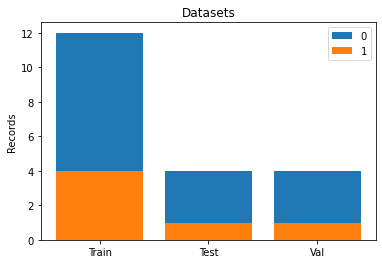

In [37]:
x_train, y_train, x_test, y_test, x_val, y_val = split(dataset=vectorized_companies_dataframe)

Input: (12, 16, 96)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16, 96)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16384)             25182208  
_________________________________________________________________
dropout_9 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 8192)              134225920 
_________________________________________________________________
dropout_10 (Dropout)         (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 409

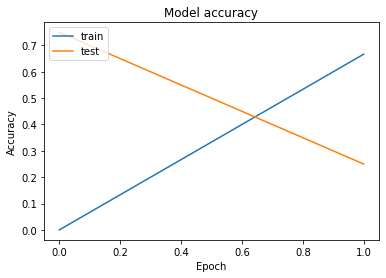

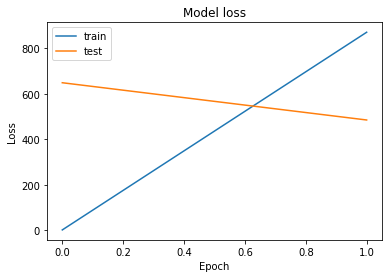

1/1 [==============================] - 0s 90ms/step - loss: 481.1202 - accuracy: 0.2500
Metrics: 481.1202087402344 0.25


In [39]:

model, loss, accuracy = train_find_matches(
    x_train,
    y_train,
    x_test,
    y_test,
    x_val,
    y_val,
    learning_rate=0.001,
    epochs=2,
    batch_size=20,
)

In [60]:
predictions: list = predict_find_matches(model=model, records=[{
    "city#1": "San Francisco",
    "country#1": "USA",
    "company_name#1": "Airbnb",
    "phone#1": "120-403-4032",
    "street_address#1": "450 9th St.",
    "website#1": "www.airbnb.com",
    "linkedin_url#1": "https://www.linkedin.com/u/airbnb",
    "facebook_url#1": "https://www.facebook.com/user/airbnb",
    "city#2": "San Francisco",
    "country#2": "USA",
    "company_name#2": "Airbnb Inc.",
    "phone#2": "120-403-4032",
    "street_address#2": "450 9th Street",
    "website#2": "www.airbnb.com",
    "linkedin_url#2": "https://www.linkedin.com/u/airbnb",
    "facebook_url#2": "https://www.facebook.com/user/airbnb",
}])
print("match!" if predictions[0] else "different!")

Vectorizing: city#1
Vectorizing: country#1
Vectorizing: company_name#1
Vectorizing: phone#1
Vectorizing: street_address#1
Vectorizing: website#1
Vectorizing: linkedin_url#1
Vectorizing: facebook_url#1
Vectorizing: city#2
Vectorizing: country#2
Vectorizing: company_name#2
Vectorizing: phone#2
Vectorizing: street_address#2
Vectorizing: website#2
Vectorizing: linkedin_url#2
Vectorizing: facebook_url#2
Input: (16, 1, 96)
Input: (1, 16, 96)
Predictions: [[1.]]
match!


### Persons Dataset

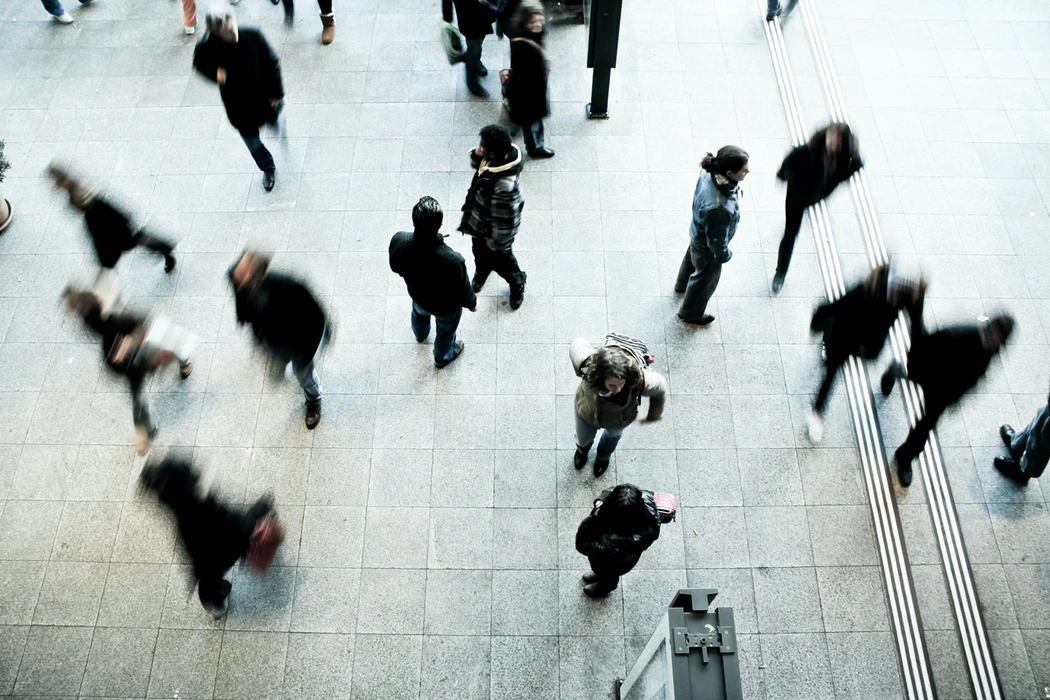

In [ ]:
raw_persons_dataframe: pd.DataFrame = generate_random_persons(total=20, nulls=.01, mutability=.01, matches=.3)

In [ ]:
raw_persons_dataframe.head(10)

In [ ]:
vectorized_persons_dataframe: pd.DataFrame = vectorize_dataframe(raw_persons_dataframe)

In [ ]:
vectorized_persons_dataframe.head(10)